In [15]:
import torch 
import torch.nn.functional as F
from torch.nn import *
import numpy as np
import matplotlib.pyplot as plt

######创建一个假数据######
n_data = torch.ones(100,2)
# 第一个数据集
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
# 第二个数据集
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)
# 合并数据集  --> 合并 并改变格式
X = torch.cat((x0,x1),0).type(torch.FloatTensor)     # 32位浮点数
y = torch.cat((y0,y1)).type(torch.LongTensor)        # 64 位整型

In [ ]:
######定义我们的神经网络#######
class MyNet(torch.nn.Module):
    # n_feature 输入的神经元的数目  n_hidden 隐藏层中的神经元数目 n_output输入神经元的数目
    def __init__(self,n_feature,n_hiddern,n_output):
        # 必要步骤 调用父类
        super(MyNet,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hiddern)
        self.predict = torch.nn.Linear(n_hiddern,n_output)
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return(x)

In [12]:
######实例化我们的神经网络######
# net = MyNet(2,10,2)
net = Sequential(
    Linear(2,10),
    ReLU(),
    Linear(10,2)
)

optimizer = torch.optim.SGD(net.parameters(),lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()      # 使用标签误差
######训练我们的神经网络######
for i in range(1000):
    prediction = net(X)
    loss = loss_func(prediction,y)
    # 梯度归零
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新结点
    optimizer.step()
    if i % 20 == 0:
        print(loss)

tensor(0.6900, grad_fn=<NllLossBackward0>)
tensor(0.0467, grad_fn=<NllLossBackward0>)
tensor(0.0254, grad_fn=<NllLossBackward0>)
tensor(0.0175, grad_fn=<NllLossBackward0>)
tensor(0.0133, grad_fn=<NllLossBackward0>)
tensor(0.0108, grad_fn=<NllLossBackward0>)
tensor(0.0091, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.00

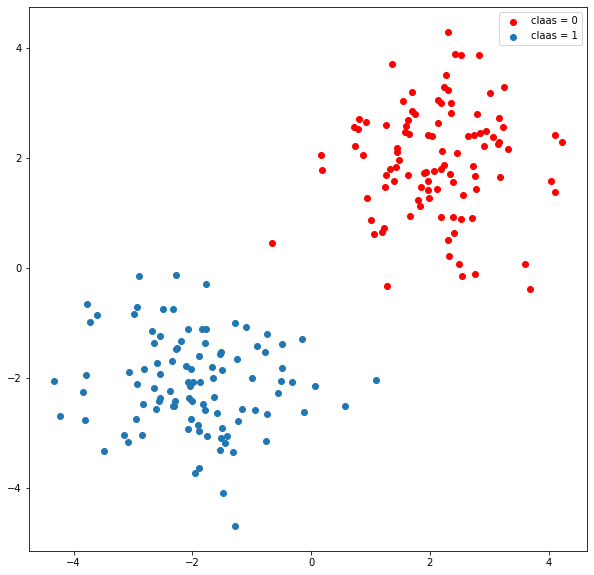

In [16]:
plt.figure(figsize=(10,10))
plt.legend(handles=[plt.scatter(x0[:,0],x0[:,1],c="r"),plt.scatter(x1[:,0],x1[:,1])],labels=['claas = 0','claas = 1'],loc='best')


In [18]:
######作出预测######
x1 = torch.FloatTensor([-0.51,0])  # !!! 必须要转换成Tensor的形式
print(net(x1))
np.argmax(net(x1).data.numpy())


tensor([-1.1356,  0.6164], grad_fn=<AddBackward0>)


1

In [ ]:
net(x1).data.numpy